# Pandas plotting PFAS compounds


In [2]:
import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.dates as mdates

import time as time

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

from matplotlib import cm

from ipywidgets import widgets, interactive, fixed, interact_manual

import matplotlib.colors

%matplotlib inline

import importlib

import pfas_helper as pfas_helper
importlib.reload(pfas_helper)

import pathlib
#importlib.reload(measurement)


In [23]:
# read SC, LY, and IS dataa and convert date/time
# IN ... initial conditions / data for each experiment

cwd = pathlib.Path.cwd()
fname_SC = cwd / 'pfas_data' / 'pfas_immo_saeulenversuche_211004.xlsx' 
fname_IN = cwd / 'pfas_data' / 'Initials.xlsx' 
fname_soil = cwd / 'pfas_data' / 'pfas_immo_feststoffproben_211004.xlsx'
fname_fluoratoms = cwd / 'pfas_data' / 'pfas_fluoratoms.xlsx'
fname_m0 = cwd / 'pfas_data' / 'pfas_m0.xlsx'


data_SC = pd.read_excel(fname_SC, sheet_name ='Ergebnisse Säuleneluate_T') # , converters= {'Date': pd.to_datetime})
data_SC.Date = pd.to_datetime(data_SC.Date, dayfirst=True)

data_IN = pd.read_excel(fname_IN)
data_IN.Date = pd.to_datetime(data_IN.Date, dayfirst=True)

data_soil = pd.read_excel(fname_soil, sheet_name = 'Tabelle4' )
N1_soil = data_soil[data_soil['WorkName'].str.startswith('N1_soil_001_start')]

data_fluoratoms = pd.read_excel(fname_fluoratoms, sheet_name = 'Tabelle2' )
m0 = pd.read_excel(fname_m0, sheet_name = 'Tabelle2' )

# Filter the Experiment that we want to look at

In [13]:
# SC options: N1_1, N1_2, N1_3, N1_4, R1_1, R1_3, R2_1, R2_2, R3_1, R3_2, R4_1, R4_2
# LY options: R1_L1, R2_L4, R3_L2, N1_L3
# IS options: N1-IS5, N1-IS6, R1-IS1, R1-IS4, R2-IS3, R2-IS4, R3-IS2, R3-IS3, R4-IS1, R4-IS2, B1, BR1, B2, BR2, B3, BR3, B4, BR4, HÜ1, HÜR1, HÜ2, HÜR2, HÜ3, HÜR3, HÜ4, HÜR4


experiment_type = widgets.Dropdown(options = ['SC', 'LY', 'IS'],
                                 description='exp_type',
                                 disabled=False,
                                 layout=widgets.Layout(width='15%')
                                 )

experiment_type

Dropdown(description='exp_type', layout=Layout(width='15%'), options=('SC', 'LY', 'IS'), value='SC')

In [14]:
chosen_experiment = widgets.SelectMultiple(options= list(data_IN[data_IN['Type'] == experiment_type.value]['Name']),
                                 description='select_experiment',
                                 disabled=False,
                                 layout=widgets.Layout(width='20%')
                                 )

chosen_experiment

SelectMultiple(description='select_experiment', layout=Layout(width='20%'), options=('N1_1', 'N1_2', 'N1_3', '…

In [15]:
soilmass_reference = widgets.Checkbox( value=False, description='soilmass_reference N1', disabled=False, indent=False )
soilmass_reference

Checkbox(value=False, description='soilmass_reference N1', indent=False)

In [16]:
relative_mass = widgets.Checkbox( value=False, description='relative_mass', disabled=False, indent=False )
relative_mass

Checkbox(value=False, description='relative_mass', indent=False)

In [17]:
fluor = widgets.Checkbox( value=False, description='fluor', disabled=False, indent=False )
fluor

Checkbox(value=False, description='fluor', indent=False)

In [18]:
TOP = widgets.Checkbox( value=False, description='TOP', disabled=False, indent=False )
TOP

Checkbox(value=False, description='TOP', indent=False)


# Calculate relevant time-series for given experiments

In [19]:
#experiment = data_IN[data_IN['Name'] == chosen_experiment.value]['Type'].all()
material = []
material_nr = []
select = {} 

for i in range (len(chosen_experiment.value)):
    material.append(list(data_IN[data_IN['Name'] == chosen_experiment.value[i]]['Material']))
    material_nr.append(list(data_IN[data_IN['Name'] == chosen_experiment.value[i]]['Number']))
    
for i in range (len(chosen_experiment.value)):   #calculations for each experiment
    if experiment_type.value == 'SC': #Saturated column
        if TOP.value == True:
            select[i] = pfas_helper.calculate_timeseries_SC_TOP(data_SC_TOP, data_IN, chosen_experiment.value[i], material[i])
        else:
            select[i] = pfas_helper.calculate_timeseries_SC(data_SC, data_IN, chosen_experiment.value[i], soilmass_reference.value, relative_mass.value, material[i], data_fluoratoms, fluor.value)

    elif experiment_type.value == 'LY': #Lysimeter
        if TOP.value == True:
            select[i] = pfas_helper.calculate_timeseries_SC_TOP(data_LY_TOP, data_IN, chosen_experiment.value[i], material[i])
        else:
            select[i] = pfas_helper.calculate_timeseries_SC(data_LY, data_IN, chosen_experiment.value[i], soilmass_reference.value, relative_mass.value, material[i], data_fluoratoms, fluor.value)

    elif experiment_type.value == 'IS': #Infinite Sink
        select[i] = pfas_helper.calculate_timeseries_IS(data_IS, data_IN, chosen_experiment.value[i], soilmass_reference.value, relative_mass.value, material[i], data_fluoratoms, fluor.value)
    

C:\Users\bierbaum\Documents\pfas_ls3\pfas_helper.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  c_c0_compound = 'c_c0_' + compounds[i]
C:\Users\bierbaum\Documents\pfas_ls3\pfas_helper.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
C:\Users\bierbaum\Documents\pfas_ls3\pfas_helper.py:97: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fr


# Visualization Options


In [24]:
x_axis = widgets.Dropdown(options = ['Sampling_Time [d]', 'Sampling_Time_mean [d]', 'Date', 'WS_sample', 
                                     'WS_mean', 'pore_vol','field_time (Y)', 'field_time_mean (Y)'], description='x_axis(1)',
                                      layout=widgets.Layout(width='30%') )

x_axis2 = widgets.Dropdown(options =  ['Sampling_Time [d]','Sampling_Time_mean [d]', 'WS_sample', 'WS_mean', 
                                       'pore_vol','field_date','field_time (Y)', 'field_time_mean (Y)'], description='x_axis(2)', 
                                       layout=widgets.Layout(width='30%'))

y_axis = widgets.SelectMultiple(options = ['all'] + ['standard substances'] + ['special selection'] + ['cum_m_sm_special selection'] +
                                #['QS'] + ['cum_m_sm_∑PFAS'] + ['cum_m_∑PFAS'] +['m_∑PFAS'] +  
                                     #list(data_SC.columns)[7:-1] +
                                     list(select[0].columns[7:-1]),
                                     #value=('EtFOSAA',), 
                                     description='y_axis(1)',layout=widgets.Layout(width='30%') )

y_axis2 = widgets.Dropdown(options = ['cum_m_sm_∑PFAS'] + ['cum_m_∑PFAS'] + ['m_∑PFAS'] + list(data_SC.columns)[7:-1],
                                     #value= 'mass_PFAS', 
                                     description='y_axis(2)', layout=widgets.Layout(width='30%') )



XCheckBox = widgets.Checkbox( value=False, description='Second x-axis', disabled=False, indent=False )
YCheckBox = widgets.Checkbox( value=False, description='Second y-axis', disabled=False, indent=False )
CheckBox1 = widgets.Checkbox( value=False, description='Log-Scale', disabled=False, indent=False )
CheckBox2 = widgets.Checkbox( value=False, description='Quotientensumme', disabled=False, indent=False )
stacked = widgets.Checkbox( value=False, description='Stacked Bar', disabled=False, indent=False )
aof = widgets.Checkbox( value=False, description='c + AOF', disabled=False, indent=False )
micro = widgets.Checkbox( value=False, description='microgram', disabled=False, indent=False )
molar = widgets.Checkbox( value=False, description='molar', disabled=False, indent=False )
bar_PFAS = widgets.Checkbox( value=False, description='Bar PFAS', disabled=False, indent=False )
bar_exp = widgets.Checkbox( value=False, description='Bar Exp', disabled=False, indent=False )
SaveFile = widgets.Checkbox(value=False, description='Save', disabled=False, indent=False )

#widgets.VBox([x_axis, y_axis, CheckBox, SaveFile])

In [25]:
file_string = time.strftime("%Y-%m-%d-%H-%m")
visualize = interact_manual(pfas_helper.visualization_lines, 
                            x_value = x_axis,
                            x2_value = x_axis2,                            
                            y_value = y_axis,
                            y2_value = y_axis2,
                            second_xaxis = XCheckBox,
                            second_yaxis = YCheckBox,
                            Log = CheckBox1,
                            micro = micro,
                            save = SaveFile,
                            select = fixed(select),
                            ex = fixed(chosen_experiment.value),
                            ex_type= fixed(experiment_type.value), 
                            ex_material = fixed(material),
                            ex_material_nr = fixed(material_nr),
                            N1_soil = fixed(N1_soil),
                            file_string = file_string
                            )

interactive(children=(Dropdown(description='x_axis(1)', layout=Layout(width='30%'), options=('Sampling_Time [d…

In [22]:
file_string = time.strftime("%Y-%m-%d-%H-%m")
visualize = interact_manual(pfas_helper.visualization_bars, 
                            x_value = x_axis,
                            x2_value = x_axis2,                            
                            y_value = y_axis,
                            y2_value = y_axis2,
                            second_xaxis = XCheckBox,
                            second_yaxis = YCheckBox,
                            Log = CheckBox1,
                            stack = stacked,
                            bar_PFAS = bar_PFAS,
                            bar_exp = bar_exp,
                            save = SaveFile,
                            select = fixed(select),
                            ex = fixed(chosen_experiment.value),
                            ex_type= fixed(experiment_type.value), 
                            ex_material = fixed(material),
                            ex_material_nr = fixed(material_nr),
                            file_string = file_string
                            )

interactive(children=(Dropdown(description='x_axis(1)', index=4, layout=Layout(width='30%'), options=('Samplin…

# Plot Soil Concentrations

In [26]:
N1_soil = data_soil[data_soil['WorkName'].str.startswith('N1_soil_001')]

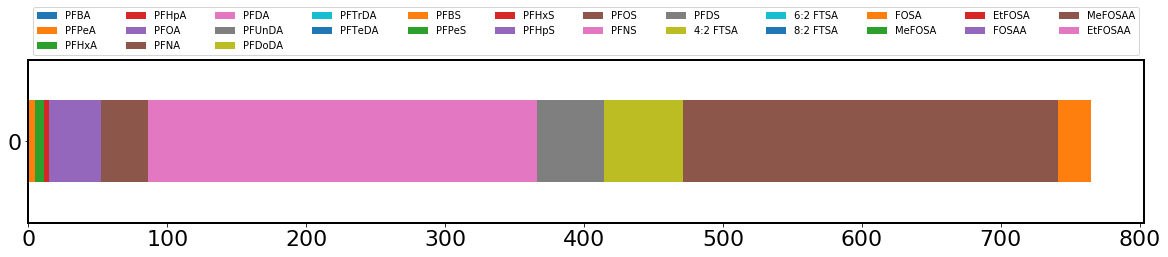

In [27]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'legend.fontsize': 10})
plt.rcParams["figure.figsize"] = (20,3)
N1_soil.plot.barh(y = N1_soil.columns[9:36], stacked=True)
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol = 12)
#ax = N1_soil.plot.barh(stacked=True)

In [28]:
N1_soils = data_soil[data_soil['WorkName'].str.startswith('N1_soil_0')]

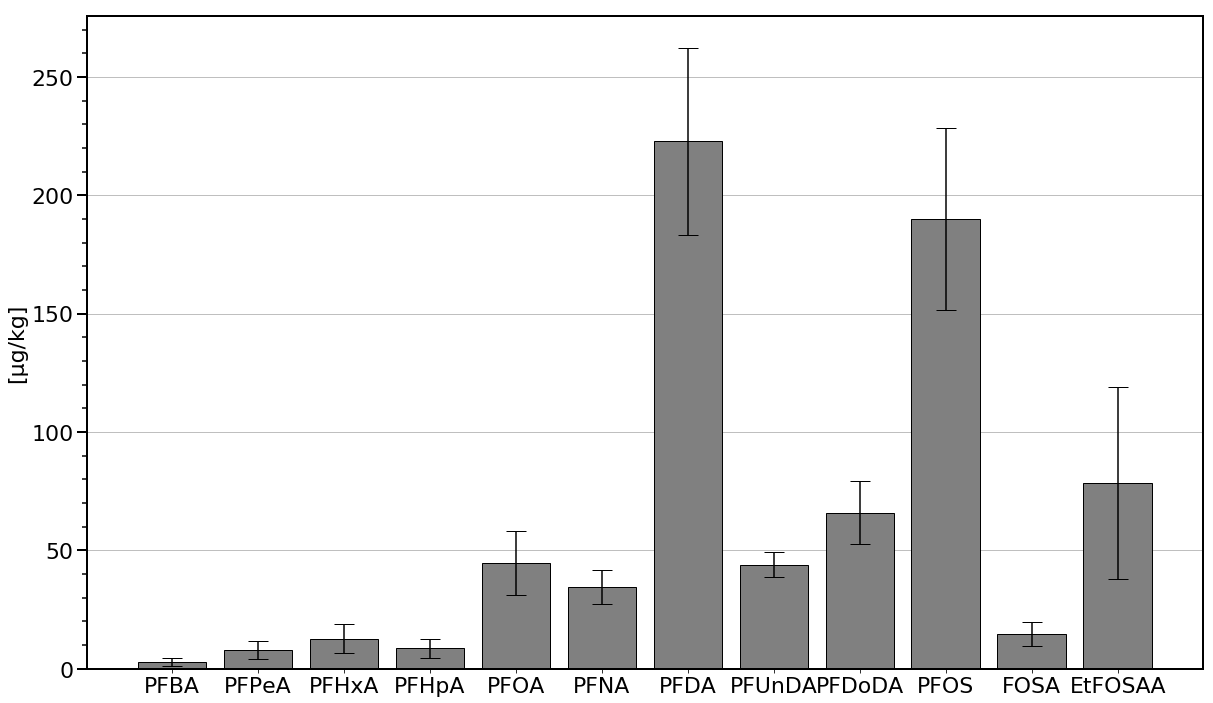

In [29]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'legend.fontsize': 10})
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams['axes.linewidth'] = 2
fig, ax = plt.subplots()
for i in range(len(N1_soils.columns[9:18])):
    ax.bar(i, np.mean(N1_soils[N1_soils.columns[i+9]]), yerr=np.std(N1_soils[N1_soils.columns[i+9]]), align='center', color='gray', edgecolor='black', ecolor='black', capsize=10)
ax.bar(i+1, np.mean(N1_soils[N1_soils.columns[24]]), yerr=np.std(N1_soils[N1_soils.columns[24]]), align='center', color='gray', edgecolor='black', ecolor='black', capsize=10)
ax.bar(i+2, np.mean(N1_soils[N1_soils.columns[30]]), yerr=np.std(N1_soils[N1_soils.columns[30]]), align='center', color='gray', edgecolor='black', ecolor='black', capsize=10)
ax.bar(i+3, np.mean(N1_soils[N1_soils.columns[36]]), yerr=np.std(N1_soils[N1_soils.columns[36]]), align='center', color='gray', edgecolor='black', ecolor='black', capsize=10)
ax.set_ylabel('[µg/kg]')
ax.set_xticks(np.arange(i+4))
ax.set_xticklabels(np.append(N1_soils.columns[9:18].values, ['PFOS', 'FOSA', 'EtFOSAA']))
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', top=False)
ax.yaxis.set_tick_params(which='minor', size=5, width=1.5, direction='out', right=False)
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax = plt.gca()   
fig = ax.get_figure()
fig.savefig("output/new.png", fontsize = 15)

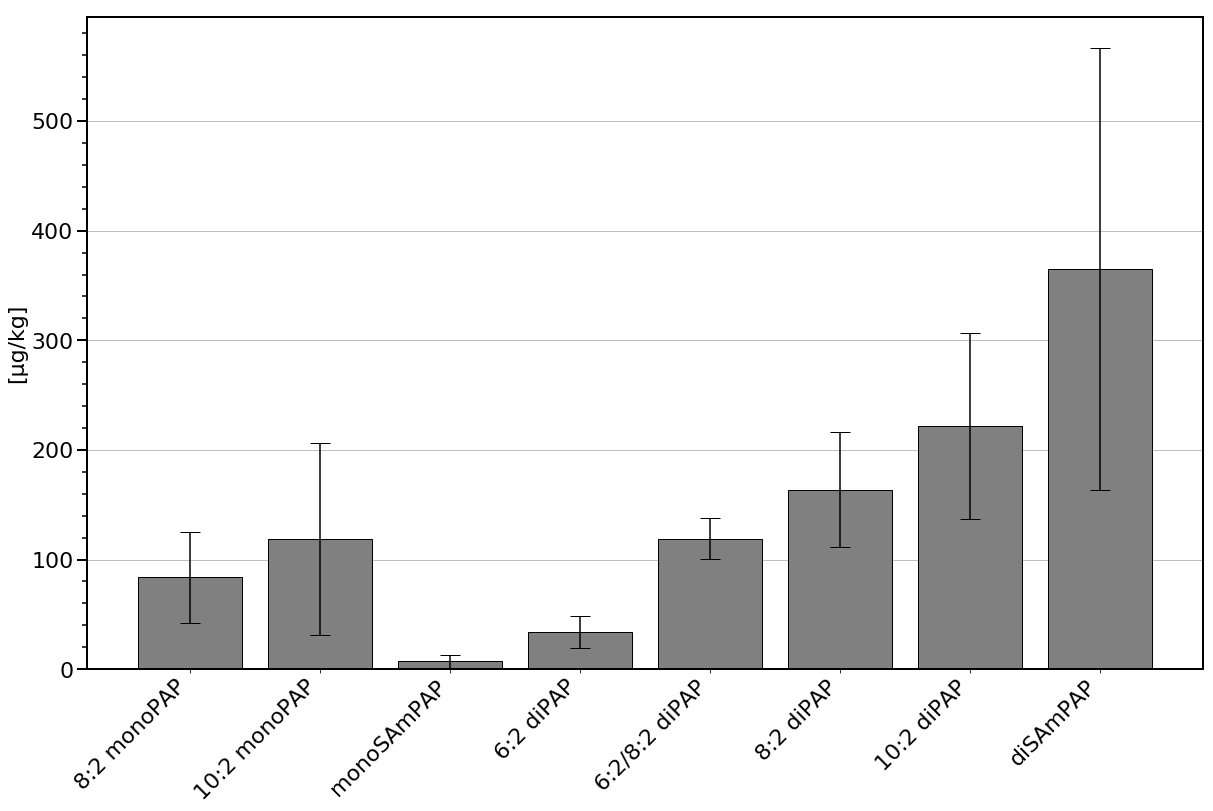

In [30]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'legend.fontsize': 10})
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams['axes.linewidth'] = 2
fig, ax = plt.subplots()
for i in range(len(N1_soils.columns[37:45])):
    ax.bar(i, np.mean(N1_soils[N1_soils.columns[i+37]]), yerr=np.std(N1_soils[N1_soils.columns[i+37]]), align='center', color='gray', edgecolor='black', ecolor='black', capsize=10)
ax.set_ylabel('[µg/kg]')
ax.set_xticks(np.arange(i+1))
ax.set_xticklabels(N1_soils.columns[37:45].values)
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', top=False)
ax.yaxis.set_tick_params(which='minor', size=5, width=1.5, direction='out', right=False)
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.xticks(rotation=45, ha='right')

ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax = plt.gca()   
fig = ax.get_figure()
fig.savefig("output/new.png", fontsize = 15)